#Gradient i podstawowa manipulacja obrazem

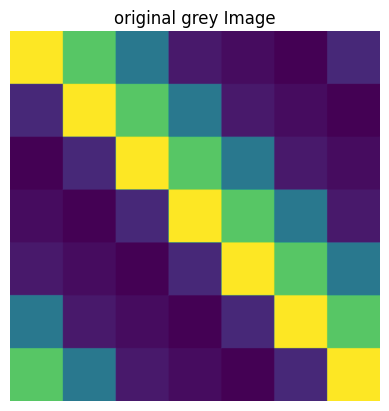

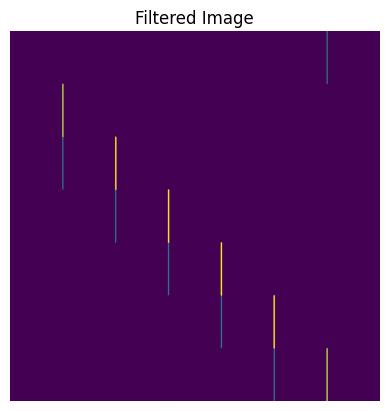

In [64]:
# ZADANIE 1. (1pkt):

# Uzupełnij funkcję, aby zwracała obraz będący rezultatem konwolucji obrazu
# img (będącym obrazem w skali szarości) z następującym filtrem:

# | -1  0  1 |
# | -4  0  4 |
# | -1  0  1 |

import numpy as np
from skimage import io
import cv2
from matplotlib import pyplot as plt

img_color = io.imread('https://i.postimg.cc/mksNZfXc/BoQS.png')
img_gray = cv2.cvtColor(img_color, cv2.COLOR_RGB2GRAY)

# ROZWIĄZANIE:

def filtert(img):
    kernel = np.array([
        [-1,0,1],
        [-4,0,4],
        [-1,0,1]])

    filter_img = cv2.filter2D(img, -1, kernel)

    return filter_img

plt.imshow(img_gray)
plt.axis('off')  # Turn off axes for better visualization
plt.title('original grey Image')
plt.show()

img = filtert(img_gray)
# Display the result using matplotlib
plt.imshow(img)
plt.axis('off')  # Turn off axes for better visualization
plt.title('Filtered Image')
plt.show()

In [58]:
# ZADANIE 2. (1 pkt):

# Napisz funkcję, która przyjmuje obraz kolorowy img i zwraca piksel będący uśrednienienm
# 4 pikseli z każdego narożnika obrazu:

from matplotlib import pyplot as plt
from skimage import io
import cv2
import math
import numpy as np

img_color = io.imread('https://i.postimg.cc/mksNZfXc/BoQS.png')


# ROZWIĄZANIE:

def get_corners_avg_px(img_color):
    height, width, _ = img_color.shape
    top_left = img_color[0, 0, :]
    top_right = img_color[0, width-1, :]
    bottom_left = img_color[height-1, 0, :]
    bottom_right = img_color[height-1, width-1, :]

    avg_pixel = np.mean([top_left, top_right, bottom_left, bottom_right], axis=0)

    return avg_pixel

# Testowanie funkcji
avg_pixel = get_corners_avg_px(img_color)
print(avg_pixel)

# TEST (dla poprawnego rozwiązania asercje powinny przechodzić):
assert type(get_corners_avg_px(img_color)) == np.ndarray
assert get_corners_avg_px(img_color).shape[0] > 1
assert math.isclose(get_corners_avg_px(img_color)[0], 192, rel_tol=1, abs_tol=0.0)

[192.25 217.   141.75 255.  ]


#Detektor Harrisa

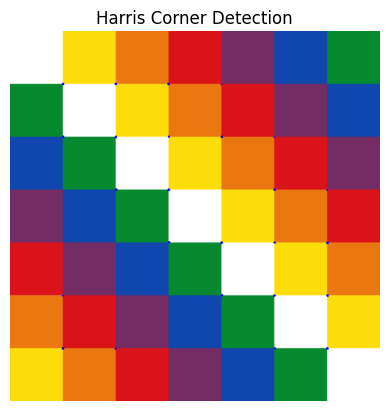

In [31]:
# ZADANIE 3. (1pkt):
import matplotlib.pyplot as plt
# Dokonaj na poniższym obrazie detekcji narożników detektorem Harrisa i wyświetl wynik na obrazie.
# Możesz korzystać z dokumentacji openCV (https://docs.opencv.org/4.x/dc/d0d/tutorial_py_features_harris.html)

img_color = io.imread('https://i.postimg.cc/mksNZfXc/BoQS.png')
img_color = cv2.cvtColor(img_color, cv2.COLOR_RGBA2RGB)
img_gray = cv2.cvtColor(img_color, cv2.COLOR_RGB2GRAY)

import cv2 as cv

gray = np.float32(img_gray)
dst = cv.cornerHarris(img_gray,2,3,0.04)

#result is dilated for marking the corners, not important
dst = cv.dilate(dst,None)

# Threshold for an optimal value, it may vary depending on the image.
img_color[dst>0.01*dst.max()]=[0,0,255]

plt.imshow(img_color)
plt.axis('off')  # Turn off axes for better visualization
plt.title('Harris Corner Detection')
plt.show()

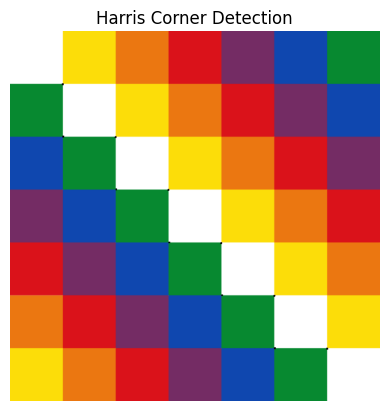

In [47]:
# ZADANIE 3b. (1pkt):

# Skopiuj tutaj kod rozwiązania zadania 3. i zmodyfikuj go tak, aby wyświetlić punktów
# charakterystycznych niż w zadaniu 3.



import matplotlib.pyplot as plt
# Dokonaj na poniższym obrazie detekcji narożników detektorem Harrisa i wyświetl wynik na obrazie.
# Możesz korzystać z dokumentacji openCV (https://docs.opencv.org/4.x/dc/d0d/tutorial_py_features_harris.html)

img_color = io.imread('https://i.postimg.cc/mksNZfXc/BoQS.png')
img_color = cv2.cvtColor(img_color, cv2.COLOR_RGBA2RGB)
img_gray = cv2.cvtColor(img_color, cv2.COLOR_RGB2GRAY)

import cv2 as cv

gray = np.float32(img_gray)
dst = cv.cornerHarris(img_gray,2,3,0.04)

#result is dilated for marking the corners, not important
dst = cv.dilate(dst,None)

# Threshold for an optimal value, it may vary depending on the image.
img_color[dst>0.1*dst.max()]=[0,0,0]
#mniej img_color[dst>0.1*dst.max()]=[0,0,0]
#wiecej img_color[dst>0.001*dst.max()]=[0,0,0]

plt.imshow(img_color)
plt.axis('off')  # Turn off axes for better visualization
plt.title('Harris Corner Detection')
plt.show()


#Sieci fully-connected i pytorch

In [48]:
#### KOD INICJALIZUJACY BIBLIOTEKI I DANE, TYLKO URUCHOM  ####

!pip install torchsummary

import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
from torchvision.transforms import functional as F

import numpy as np
import numpy
from torchsummary import summary

training_data = datasets.CIFAR10(root="data",train=True,download=True,transform=ToTensor(),)
test_data = datasets.CIFAR10(root="data",train=False, download=True, transform=ToTensor(),)

batch_size = 64

train_dataloader = DataLoader(training_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

for X, y in test_dataloader:
    print(f"Shape of X [N, C, H, W]: {X.shape}")
    print(f"Shape of y: {y.shape} {y.dtype}")
    break

for X, y in train_dataloader:
    print(f"Shape of X [N, C, H, W]: {X.shape}")
    print(f"Shape of y: {y.shape} {y.dtype}")
    break

#### KONIEC KODU INICJALIZUJACEGO BIBLIOTEKI I DANE ####

100%|██████████| 170M/170M [00:02<00:00, 77.2MB/s]


Extracting data/cifar-10-python.tar.gz to data
Files already downloaded and verified
Shape of X [N, C, H, W]: torch.Size([64, 3, 32, 32])
Shape of y: torch.Size([64]) torch.int64
Shape of X [N, C, H, W]: torch.Size([64, 3, 32, 32])
Shape of y: torch.Size([64]) torch.int64


In [50]:
# ZADANIE 4. (1pkt):

# Uzupełnij definicję klasy NeuralNetwork tak, aby uzyskać sieć fully-connected z:
#    warstwą wejściową: 3072 wejścia, 512 wyjść,
#    warstwą ukrytą: 512 wejść, 512 wyjść,
#    warstwą wyjściową: 512 wejść, 10 wyjść
#    funkcjami aktywacji ReLU

device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")


class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(

            ### Twój kod tutaj ####
            # nn.Linear(3072, 1), # przykładowa wartstwa, tu napisz rozwiązanie!

            nn.Linear(3072, 512), # warstwa wejsciowa
            nn.ReLU(),               # funkcja aktywacji warstwy wejsciowej
            nn.Linear(512, 512),     # warstwa ukryta
            nn.ReLU(),               # funkcja aktywacji warstwy ukrytej
            nn.Linear(512, 10)       # warstwa wyjściowa, 10 neuronow bo 10 klas
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork().to(device)
summary(model, (3, 32, 32))

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

Using cpu device
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
           Flatten-1                 [-1, 3072]               0
            Linear-2                  [-1, 512]       1,573,376
              ReLU-3                  [-1, 512]               0
            Linear-4                  [-1, 512]         262,656
              ReLU-5                  [-1, 512]               0
            Linear-6                   [-1, 10]           5,130
Total params: 1,841,162
Trainable params: 1,841,162
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.01
Forward/backward pass size (MB): 0.04
Params size (MB): 7.02
Estimated Total Size (MB): 7.07
----------------------------------------------------------------


In [51]:
# ZADANIE 5. (1 pkt):

# W poniższej funkcji służącej do uczenia modelu jest błąd, który powoduje, że
# model się nie uczy, a dokładność klasyfikacji nie rośnie (możesz to zaobserwować uruchamiając
# komórki niżej, z definicją funkcji test i pętlą uczenia)

# popraw funkcję train tak, aby model uczył się poprawnie

def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

In [52]:
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [53]:
epochs = 100
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dataloader, model, loss_fn, optimizer)
    test(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 2.304094  [    0/50000]
loss: 2.298949  [ 6400/50000]
loss: 2.291102  [12800/50000]
loss: 2.285710  [19200/50000]
loss: 2.276222  [25600/50000]
loss: 2.271917  [32000/50000]
loss: 2.276299  [38400/50000]
loss: 2.282306  [44800/50000]
Test Error: 
 Accuracy: 13.1%, Avg loss: 2.268686 

Epoch 2
-------------------------------
loss: 2.287441  [    0/50000]
loss: 2.274681  [ 6400/50000]
loss: 2.249156  [12800/50000]
loss: 2.267595  [19200/50000]
loss: 2.240103  [25600/50000]
loss: 2.239501  [32000/50000]
loss: 2.248502  [38400/50000]
loss: 2.246897  [44800/50000]
Test Error: 
 Accuracy: 20.3%, Avg loss: 2.232813 

Epoch 3
-------------------------------
loss: 2.263317  [    0/50000]
loss: 2.240905  [ 6400/50000]
loss: 2.196822  [12800/50000]
loss: 2.237706  [19200/50000]
loss: 2.194078  [25600/50000]
loss: 2.193348  [32000/50000]
loss: 2.215576  [38400/50000]
loss: 2.194162  [44800/50000]
Test Error: 
 Accuracy: 23.6%, Avg loss: 2.182208 

Epoc

KeyboardInterrupt: 